<a href="https://colab.research.google.com/github/roberthsu2003/machine_learning/blob/main/%E6%A0%B8%E5%8C%96%E6%94%AF%E6%8F%B4%E5%90%91%E9%87%8F%E6%A9%9F/svm_5%E4%B9%B3%E7%99%8C%E8%B3%87%E6%96%99%E9%9B%86%E4%BD%BF%E7%94%A8SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
%pip install mglearn

### svm_5乳癌資料集使用SVM
- 預設C=1
- 預設gamma = 1/n_features

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC(C=1).fit(X_train, y_train)

print("訓練集準確度:{:.2f}".format(svc.score(X_train, y_train)))
print("測試集準確度:{:.2f}".format(svc.score(X_test, y_test)))


訓練集準確度:0.90
測試集準確度:0.94


### 檢查乳癌每資料特徵的最大和最小數值
- 從這幅圖中，我們可以判斷出乳癌資料集中的特徵在數量級上完全不同。
- 對於其他模型（如線性模型）來說，這可能是一個問題，但對於核 SVM 來說，它具有毀滅性的影響。

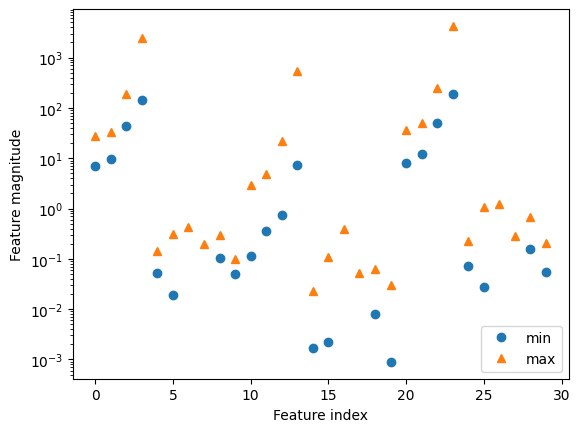

In [3]:
import matplotlib.pyplot as plt

plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label='max')
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

⬆︎乳癌資料集的特徵範圍（請注意，y 軸具有對數刻度）

### 支援向量機 (SVM) 的預處理數據

⬇︎解決此問題的一種方法是重新縮放每個特徵，以使它們大致處於相同比例。核 SVM 的常見重新縮放方法是縮放數據，使得所有特徵都在 0 和 1 之間。我們將看到如何使用 MinMaxScaler 預處理方法來實現這一點

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

#計算訓練集上每個特徵的最小值
min_on_training = X_train.min(axis=0)

#計算訓練集上每個特徵的範圍（最大值 - 最小值）
range_on_training = (X_train - min_on_training).max(axis=0)

# 減去最小值，然後除以範圍
# 之後，每個特徵的最小值=0，最大值=1
X_train_scaled = (X_train - min_on_training) / range_on_training

print("訓練集每個特徵的最小值\n{}".format(X_train_scaled.min(axis=0)))
print("訓練集每個特徵的最大值\n{}".format(X_train_scaled.max(axis=0)))

#計算測試集上每個特徵的最小值
min_on_testing = X_test.min(axis=0)
#計算測試集上每個特徵的範圍（最大值 - 最小值)
range_on_testing = (X_test - min_on_testing).max(axis=0)

# 減去最小值，然後除以範圍
# 之後，每個特徵的最小值=0，最大值=1
X_test_scaled = (X_test - min_on_testing) / range_on_testing

print("測試集每個特徵的最小值\n{}".format(X_test_scaled.min(axis=0)))
print("測試集每個特徵的最大值\n{}".format(X_test_scaled.max(axis=0)))

訓練集每個特徵的最小值
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
訓練集每個特徵的最大值
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
測試集每個特徵的最小值
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
測試集每個特徵的最大值
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


### 再訓練


In [5]:
svc = SVC(C=1,gamma=0.07).fit(X_train_scaled, y_train)
print("訓練集準確度:{:.2f}".format(svc.score(X_train_scaled, y_train)))
print("測試集準確度:{:.2f}".format(svc.score(X_test_scaled, y_test)))

訓練集準確度:0.96
測試集準確度:0.96
